In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
# Task 7a 
C=0.21
rho=1.23 #kg/m^3
A=2.33 # m^2
# Største model S masse
M=2250 # kg
print(" a)")
# Hvis bilen kjører med farten 80 km/h
d=10000
v_a = 80/3.6
v_b = 100/3.6

airresistance_a = 1/2 * rho * A * C * v_a**2
airresistance_b = 1/2 * rho * A * C * v_b**2

W_a = airresistance_a * d
W_b = airresistance_b * d

def jouleToKWH(x):
    return x*2.77810**(-7)

print(f"Luftmotstandens arbeid ved 80km/t: {round(jouleToKWH(W_a))} kWh")
print(f"Luftmotstandens arbeid ved 100km/t: {round(jouleToKWH(W_b))} kWh")


 a)
Luftmotstandens arbeid ved 80km/t: 1164 kWh
Luftmotstandens arbeid ved 100km/t: 1818 kWh


 b) 
Fartsgraf de første 10 sekundene ved maksfart 80 km/t og 100 km/t


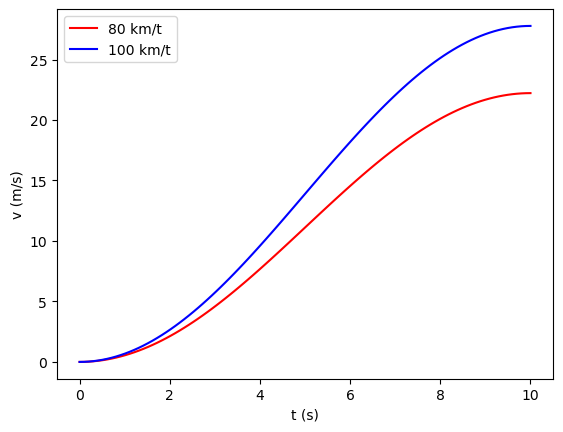

In [3]:
# Task 7b 
print(" b) ")
def v(t,vmax):
    v=0.5*vmax*1000/3600 *(np.sin((np.pi/10)*t-np.pi/2)+1)
    return v

x = np.linspace(0, 10, 100)

plt.plot(x, v(x,80), color='red', label = "80 km/t")
plt.plot(x,v(x,100), color='blue', label = "100 km/t")
plt.legend()

plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
print("Fartsgraf de første 10 sekundene ved maksfart 80 km/t og 100 km/t")
plt.show()

In [4]:
# Task 7c
print(" c)")

distance_80, error = integrate.quad(v, 0, 10,args=80)
distance_100, error = integrate.quad(v, 0, 10,args=100)

print("Integral av fartsgraf, altså strekning, de første 10 sekundene:")
print(f" ved 80 km/t: {round(distance_80)} m")
print(f" ved 100 km/t: {round(distance_100)} m")

 c)
Integral av fartsgraf, altså strekning, de første 10 sekundene:
 ved 80 km/t: 111 m
 ved 100 km/t: 139 m


In [5]:
# Task 7d
print(" d)")

def kin(v):
    return 1/2 * M * (v/3.6)**2

print("Kinetisk energi ved maksfart:")
print(f" ved 80 km/t: {round(jouleToKWH(kin(80)))} kWh")
print(f" ved 100 km/t: {round(jouleToKWH(kin(100)))} kWh")

 d)
Kinetisk energi ved maksfart:
 ved 80 km/t: 435 kWh
 ved 100 km/t: 680 kWh


In [6]:
# Task 7e
print(" e)")

def drag_effect(t,vmax):
    return 0.5*A*rho*C*v(t,vmax)**3

friction_result_80,err = integrate.quad(drag_effect, 0, 10, args=80)
friction_result_100,err = integrate.quad(drag_effect, 0, 10, args=100)

print("Arbeid gjort av friksjonen de første 10 sekundene:")
print(f" ved 80 km/t: {round(friction_result_80)} J")
print(f" ved 100 km/t: {round(friction_result_100)} J")

 e)
Arbeid gjort av friksjonen de første 10 sekundene:
 ved 80 km/t: 10320 J
 ved 100 km/t: 20155 J


In [10]:
# Task 7f
print(" f)")

friksjon_80 = drag_effect(10,80)/(80/3.6)
friksjon_100 = drag_effect(10,100)/(100/3.6)

friksjon_total_80 = friksjon_80 * (d - 2*distance_80) + friction_result_80*2
friksjon_total_100 = friksjon_100 * (d - 2*distance_80) + friction_result_100*2

print("Totalt arbeid utført av friksjon:")
print(f" ved 80 km/t: {round(friksjon_total_80)} J")
print(f" ved 100 km/t: {round(friksjon_total_100)} J")

 f)
Totalt arbeid utført av friksjon:
 ved 80 km/t: 1473639 J
 ved 100 km/t: 2310623 J


In [12]:
# Task 7g
print(" g)")

total_time_80 = 10*2 + (d - 2*distance_80)/(v_a)
total_time_100 = 10*2 + (d - 2*distance_80)/(v_b)

efficiency_loss_80 = friksjon_total_80/total_time_80
efficiency_loss_100 = friksjon_total_100/total_time_100

print("Effekttap")
print(f" ved 80 km/t: {round(efficiency_loss_80)}W")
print(f" ved 100 km/t: {round(efficiency_loss_100)}W")

 g)
Effekttap
 ved 80 km/t: 3204W
 ved 100 km/t: 6211W
